In [69]:
import cv2
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm

import helper

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (20, 20)  # that's default image size for this 

%matplotlib inline

In [2]:
ls

default_lenet_model_test.csv  digits.pyc             helper.pyc
digits.ipynb                  digits_train.csv       model_evaluation.md
digits_labels.txt             digits_validation.csv  models.py
digits_predictions.txt        exploration.ipynb
digits.py                     helper.py


In [10]:
ls ../../data/

cookies.txt            imgs_subset.zip            train.csv
digits_labels.txt      imgs.zip                   train.csv.zip
digits_train.csv       __MACOSX/                  train_digits.csv
digits_validation.csv  sample_submission.csv      train_digits_shuffled.csv
imgs/                  sample_submission.csv.zip  w_7489.jpg
imgs_subset/           test.csv                   w_7489.jpg.zip


In [11]:
ls ../../data/imgs/ | head 

w_0.jpg
w_10000.jpg
w_10001.jpg
w_10002.jpg
w_10003.jpg
w_10004.jpg
w_10005.jpg
w_10006.jpg
w_10007.jpg
w_10008.jpg
ls: write error


## Distribution

In [12]:
train_df = pd.read_csv('../../data/train.csv')

In [13]:
train_df.head()

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


In [14]:
train_df['whaleID'].value_counts()

whale_95370    47
whale_38681    43
whale_28892    33
whale_90957    30
whale_36851    30
whale_24458    29
whale_85464    28
whale_51195    28
whale_65586    27
whale_52749    26
whale_89615    24
whale_34656    24
whale_08017    24
whale_78280    24
whale_68116    23
whale_79823    23
whale_73666    23
whale_95091    23
whale_70138    22
whale_48966    22
whale_26288    22
whale_48813    22
whale_87291    22
whale_61461    21
whale_74232    21
whale_03227    21
whale_87604    21
whale_17604    21
whale_66353    21
whale_23821    20
               ..
whale_07331     2
whale_09422     2
whale_97440     2
whale_69943     2
whale_80124     2
whale_44699     2
whale_88085     1
whale_77984     1
whale_88226     1
whale_51332     1
whale_54497     1
whale_90966     1
whale_05140     1
whale_34513     1
whale_64299     1
whale_89271     1
whale_22212     1
whale_56281     1
whale_21655     1
whale_88432     1
whale_45294     1
whale_04480     1
whale_86081     1
whale_08729     1
whale_6653

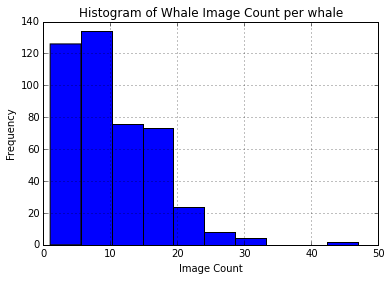

In [78]:
train_df['whaleID'].value_counts().hist()
plt.title('Histogram of Whale Image Count per whale')
plt.ylabel('Frequency')
plt.xlabel('Image Count')

As can be seen, there are a lot of whales that only have one image

In [16]:
num_train_images = len(train_df)
num_unique_whales= len(train_df['whaleID'].unique())
print ("There are %s unique whales"%(num_unique_whales))
print ("There are %s images"%(num_train_images))

There are 447 unique whales
There are 4544 images


In [20]:
img_folder='../../data/imgs'

In [21]:
sample_whale_img='w_10001.jpg'

### Sample Whale Image

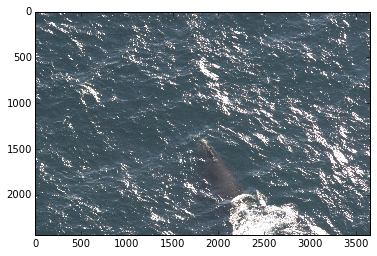

In [70]:
helper.display_image(sample_whale_img,base_path=img_folder)

In [43]:
im = cv2.imread(img_folder+'/'+sample_whale_img)
im3 = im.copy()
hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(61,61),0)
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)

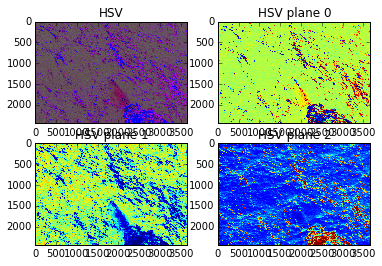

In [71]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(hsv)
axarr[0,0].set_title('HSV')
axarr[0,1].imshow(hsv[:,:,0])
axarr[0,1].set_title('HSV plane 0')
axarr[1,0].imshow(hsv[:,:,1])
axarr[1,0].set_title('HSV plane 1')
axarr[1,1].imshow(hsv[:,:,2])
axarr[1,1].set_title('HSV plane 2')


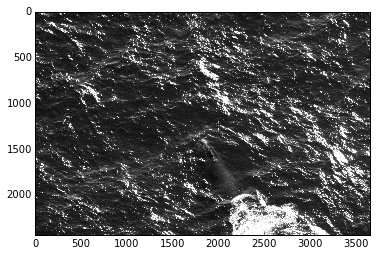

In [39]:
plt.imshow(gray,cmap = cm.Greys_r)

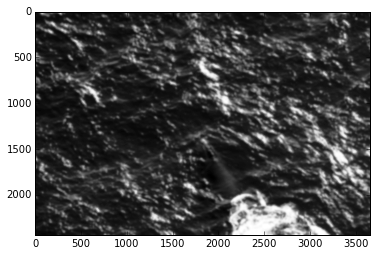

In [40]:
plt.imshow(blur,cmap = cm.Greys_r)

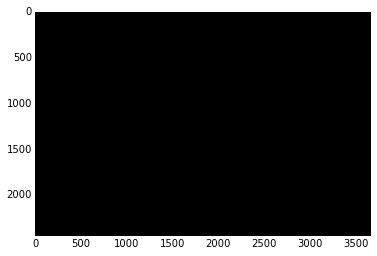

In [41]:
plt.imshow(thresh,cmap = cm.Greys_r)

In [50]:
?cv2.adaptiveThreshold